In [68]:
# Load some test data
import pandas as pd
mpg = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/mpg.csv')
original_mpg = mpg.copy()
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [69]:
mpg.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [70]:
# Import the libraries we need
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Commonly used modules
import numpy as np

# Images, plots, display, and visualization
import matplotlib.pyplot as plt
import pandas as pd
# import seaborn as sns
# import cv2
# import IPython
# from six.moves import urllib

# print(tf.__version__)
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, r2_score


In [71]:
# need to deal with ?s in the data
mpg.loc[[32],'horsepower'] = 72
mpg.loc[[126],'horsepower'] = 85
mpg.loc[[330],'horsepower'] = 64
mpg.loc[[354],'horsepower'] = 83
mpg.loc[[336],'horsepower'] = 75
mpg.loc[[374],'horsepower'] = 90

In [72]:
mpg['origin'] = mpg['origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
mpg = pd.get_dummies(mpg, columns=['origin'], prefix='', prefix_sep='')
mpg.tail()


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,name,Europe,Japan,USA
393,27.0,4,140.0,86,2790,15.6,82,ford mustang gl,False,False,True
394,44.0,4,97.0,52,2130,24.6,82,vw pickup,True,False,False
395,32.0,4,135.0,84,2295,11.6,82,dodge rampage,False,False,True
396,28.0,4,120.0,79,2625,18.6,82,ford ranger,False,False,True
397,31.0,4,119.0,82,2720,19.4,82,chevy s-10,False,False,True


In [73]:
mpg['maker'] = mpg['name'].str.split(' ').str[0]
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,name,Europe,Japan,USA,maker
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu,False,False,True,chevrolet
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320,False,False,True,buick
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite,False,False,True,plymouth
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst,False,False,True,amc
4,17.0,8,302.0,140,3449,10.5,70,ford torino,False,False,True,ford


In [74]:
one_hot = pd.get_dummies(mpg[['maker']], drop_first=False)
mpg = mpg.join(one_hot)
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,name,Europe,Japan,...,maker_renault,maker_saab,maker_subaru,maker_toyota,maker_toyouta,maker_triumph,maker_vokswagen,maker_volkswagen,maker_volvo,maker_vw
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu,False,False,...,False,False,False,False,False,False,False,False,False,False
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320,False,False,...,False,False,False,False,False,False,False,False,False,False
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite,False,False,...,False,False,False,False,False,False,False,False,False,False
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst,False,False,...,False,False,False,False,False,False,False,False,False,False
4,17.0,8,302.0,140,3449,10.5,70,ford torino,False,False,...,False,False,False,False,False,False,False,False,False,False


In [75]:
X = mpg.drop(columns=['name','maker','mpg'])
y = mpg['mpg']

In [76]:
# look at data, now it is all numeric
X


,cylinders,displacement,horsepower,weight,acceleration,year,Europe,Japan,USA,maker_amc,...,maker_renault,maker_saab,maker_subaru,maker_toyota,maker_toyouta,maker_triumph,maker_vokswagen,maker_volkswagen,maker_volvo,maker_vw
0,8,307.0,130,3504,12.0,70,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,8,350.0,165,3693,11.5,70,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,8,318.0,150,3436,11.0,70,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,8,304.0,150,3433,12.0,70,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
4,8,302.0,140,3449,10.5,70,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,4,140.0,86,2790,15.6,82,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
394,4,97.0,52,2130,24.6,82,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
395,4,135.0,84,2295,11.6,82,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
396,4,120.0,79,2625,18.6,82,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [78]:
y_train

,mpg
157,15.0
109,21.0
17,21.0
253,20.5
24,21.0
...,...
71,19.0
106,12.0
270,21.1
348,37.7


In [79]:
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train = norm.transform(X_train)

# transform testing dataabs
X_test = norm.transform(X_test)

In [80]:
# len(X_train[0])

In [81]:
# build a neural network using a sequential model
# input layer node size is the same as the training columns
# hidden layers: 128 node layer, 256 node layer, 64 node layer
# a single node output layer
model = Sequential()
model.add(Dense(32, input_dim=len(X_train[0]), activation='swish'))
model.add(Dropout(.5))
model.add(Dense(16, activation='swish'))
model.add(Dense(64, activation='swish'))

model.add(Dense(1, activation='relu'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [82]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 32)             │         1,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,185 (12.44 KB)

 Trainable params: 3,185 (12.44 KB)

 Non-trainable params: 0 (0.00 B)

In [83]:
opt = keras.optimizers.Adam(learning_rate=0.003)
# opt = keras.optimizers.Adam()
model.compile(loss="mean_squared_error", optimizer=opt, metrics=['mse'])

In [84]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_mse', patience=130, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=2000, validation_split=.35, batch_size=10, callbacks=[early_stop],shuffle=False)
# history = model.fit(train_features, train_labels, epochs=2000, verbose=0, validation_split = .2, batch_size=tester2,
#                     callbacks=[early_stop, PrintDot()])

hist = pd.DataFrame(history.history)

Epoch 1/2000
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 617.6121 - mse: 617.6121 - val_loss: 547.4850 - val_mse: 547.4850
Epoch 2/2000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 512.7876 - mse: 512.7876 - val_loss: 253.1318 - val_mse: 253.1318
Epoch 3/2000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 210.1286 - mse: 210.1286 - val_loss: 90.9455 - val_mse: 90.9455
Epoch 4/2000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 77.1909 - mse: 77.1909 - val_loss: 63.0083 - val_mse: 63.0083
Epoch 5/2000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 50.8718 - mse: 50.8718 - val_loss: 37.8819 - val_mse: 37.8819
Epoch 6/2000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 42.3310 - mse: 42.3310 - val_loss: 30.4827 - val_mse: 30.4827
Epoch 7/2000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 29.8820 - mse: 29.8820 - val_loss: 27.1063 - val_mse: 27.1063
Epoch 8/2000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 26.6231 - mse: 26.6231 - val_loss: 24.4527 - val_mse: 24.4527
Epoch 9/2000


In [85]:
hist

,loss,mse,val_loss,val_mse
0,593.107910,593.107910,547.484985,547.484985
1,441.616913,441.616913,253.131775,253.131775
2,162.872406,162.872406,90.945534,90.945534
3,81.084183,81.084183,63.008305,63.008305
4,54.368412,54.368412,37.881859,37.881859
...,...,...,...,...
257,4.499003,4.499003,14.370199,14.370199
258,4.975458,4.975458,14.746599,14.746599
259,5.186038,5.186038,15.090367,15.090367
260,6.385773,6.385773,15.112533,15.112533


In [86]:
# h = hist
hist = hist.reset_index()
# h

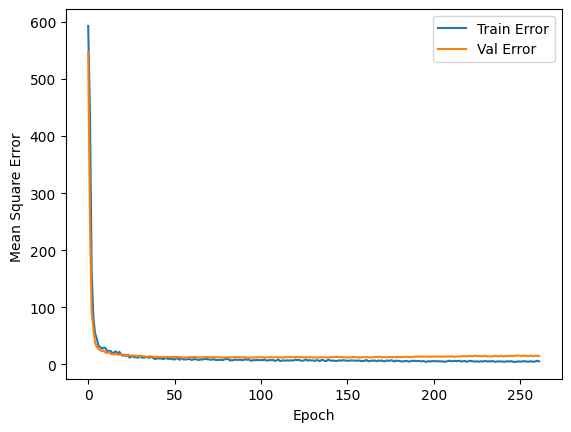

In [87]:
def plot_history():
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error ')
    plt.plot(hist['index'], hist['mse'], label='Train Error')
    plt.plot(hist['index'], hist['val_mse'], label = 'Val Error')
    plt.legend()
    # plt.ylim([0,50])

plot_history()

In [88]:
predictions = np.round(model.predict(X_test),1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 184ms/step


In [89]:
predictions

array([[35.5],
       [28.7],
       [18.3],
       [16.1],
       [15.2],
       [24.7],
       [25.9],
       [13. ],
       [21.8],
       [19.5],
       [14.7],
       [38.9],
       [25.4],
       [15.6],
       [22.9],
       [13.8],
       [30. ],
       [20.7],
       [15.7],
       [36. ],
       [22.2],
       [18.4],
       [22.2],
       [28.7],
       [16.2],
       [41.6],
       [22. ],
       [23.9],
       [18.2],
       [14.2],
       [26.7],
       [36.7],
       [16.8],
       [23.1],
       [37.8],
       [14.5],
       [18.5],
       [17.4],
       [15.2],
       [26.5],
       [33.6],
       [26.6],
       [19.2],
       [13.5],
       [21. ],
       [35.3],
       [23.7],
       [24.9],
       [23.7],
       [28.1],
       [21.4],
       [23.2],
       [35. ],
       [13.5],
       [24.2],
       [14.7],
       [15. ],
       [28.4],
       [21. ],
       [19.1],
       [16.1],
       [34.5],
       [21.9],
       [20.7],
       [19.4],
       [22.6],
       [36

In [90]:

result = root_mean_squared_error(y_test, predictions)
result

2.989746443354006

In [91]:

r2 = r2_score(y_test,predictions)
r2

0.8442521105988481

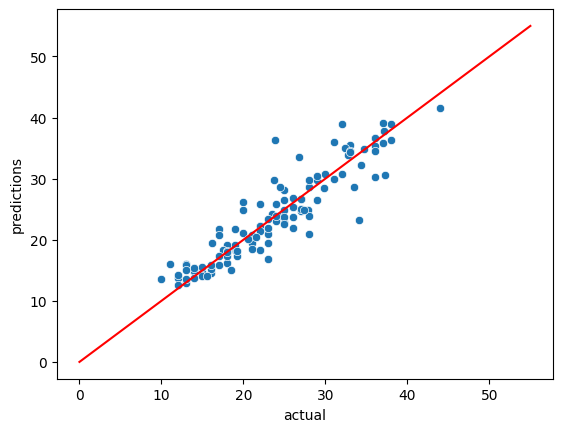

In [92]:
pred = pd.DataFrame(predictions,columns=['predictions'])
pred
pred['actual'] = y_test.tolist()
pred

pred['difference'] = pred['actual']-pred['predictions']
pred

import seaborn as sns
xlims =(0,55)
ax = sns.scatterplot(data=pred,x='actual',y='predictions')
ax.plot(xlims,xlims, color='r')
plt.show()

In [93]:
import json
from joblib import dump
# Save the trained neural network
model.save("model.keras")  # recommended modern format

# Save feature names (order matters!)
feature_names = X.columns.to_list()
with open("feature_names.json", "w") as f:
    json.dump(feature_names, f)

dump(norm, "scaler.joblib")
print("Saved NN model and feature names")

Saved NN model and feature names


In [94]:
# Define a deterministic preprocessing function for production and test it
import pandas as pd
import json
from joblib import load

def preprocess_for_prod(
    df_raw,
    feature_list_path="feature_names.json",
    scaler_path="scaler.joblib"
):
    df = df_raw.copy()

    # --- Numeric preprocessing ---
    if 'horsepower' in df.columns:
        df['horsepower'] = df['horsepower'].replace('?', 0).astype(float)

    # --- Categorical preprocessing ---
    if 'origin' in df.columns:
        df['origin'] = df['origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'}).fillna('Unknown')
    if 'name' in df.columns:
        df['maker'] = df['name'].astype(str).str.split(' ').str[0]
    else:
        df['maker'] = 'Unknown'

    # --- One-hot encoding ---
    origin_dummies = pd.get_dummies(df['origin'], prefix='', prefix_sep='') if 'origin' in df.columns else pd.DataFrame(index=df.index)
    maker_dummies = pd.get_dummies(df[['maker']]) if 'maker' in df.columns else pd.DataFrame(index=df.index)

    # --- Combine numeric + dummies ---
    numeric_cols = [c for c in ['cylinders','displacement','acceleration','weight','horsepower','year'] if c in df.columns]
    Xcand = pd.concat([df[numeric_cols], origin_dummies, maker_dummies], axis=1)

    # --- Ensure features match expected list ---
    with open(feature_list_path) as f:
        expected = json.load(f)

    # Add missing columns
    for col in expected:
        if col not in Xcand.columns:
            Xcand[col] = 0
    # Keep only expected columns in order
    Xcand = Xcand[expected]

    # --- Scaling (NEW) ---
    scaler = load(scaler_path)
    X_scaled = scaler.transform(Xcand)

    return X_scaled

from tensorflow.keras.models import load_model

loaded = load_model("model.keras")

# Quick sanity check: preprocess a slice of the original raw dataframe (aligned with y_test) and predict
raw_test = original_mpg.loc[y_test.index]
Xp = preprocess_for_prod(raw_test)
# Load saved model and predict to ensure pipeline works
# loaded = load('xgb_model.joblib')
preds = loaded.predict(Xp)
preds = np.round(loaded.predict(Xp),1)
print('Test RMSE after production preprocessing:', root_mean_squared_error(y_test, preds))

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Test RMSE after production preprocessing: 2.99752682945081


In [103]:
test_input = {
    "cylinders": 8,
    "displacement": 350,
    "acceleration": 11.5,
    "weight": 3693,
    "horsepower": 16,
    "year": 70,
    "origin": 1,
    "name": "buick skylark 320"
}

# Convert to a single-row DataFrame
df_test = pd.DataFrame([test_input])

# Preprocess using your existing function
Xp_test = preprocess_for_prod(df_test, feature_list_path='feature_names.json')

# Load your saved model
loaded = load_model("model.keras")


# Make prediction
pred = loaded.predict(Xp_test)

print("Prediction for single test input:", pred[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 647ms/step
Prediction for single test input: [17.85452]
